In [4]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import scipy.stats as sts
from config import user, password

In [5]:
# source reference
#https://blog.panoply.io/connecting-jupyter-notebook-with-postgresql-for-python-data-analysis
from sqlalchemy import create_engine
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = user 
POSTGRES_PASSWORD = password  
POSTGRES_DBNAME = '09-SQL-Homework' 
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

In [6]:
salaries_df = pd.read_sql_query('''SELECT salary FROM salaries;''', cnx)

In [7]:
# examine the sql return
salaries_df.head()

,salary
0,60117
1,65828
2,40006
3,40054
4,78228


In [8]:
# examine the salaries
# Get the measures of central tendency
count_salary = salaries_df['salary'].count()
print(f"The salary count is {count_salary}")

# Get the measures of central tendency
min_salary = np.min(salaries_df['salary'])
print(f"The min salary is {min_salary}")

# Get the max salary  
max_salary = np.max(salaries_df['salary'])
print(f"The max salary is {max_salary}")

# Get the median salary 
median_salary= np.median(salaries_df['salary'])
print(f"The median salary is {median_salary}")

mode_salary = sts.mode(salaries_df['salary'])
print(f"The mode salary is {mode_salary}")

The salary count is 300024
The min salary is 40000
The max salary is 129492
The median salary is 48681.0
The mode salary is ModeResult(mode=array([40000], dtype=int64), count=array([95346]))


In [9]:
# examine the salaries
salaries_df['salary'].value_counts().sort_values(ascending=False)

40000     95346
55581        19
53738        18
53078        18
47454        17
          ...  
83515         1
109998        1
79413         1
105802        1
81762         1
Name: salary, Length: 50355, dtype: int64

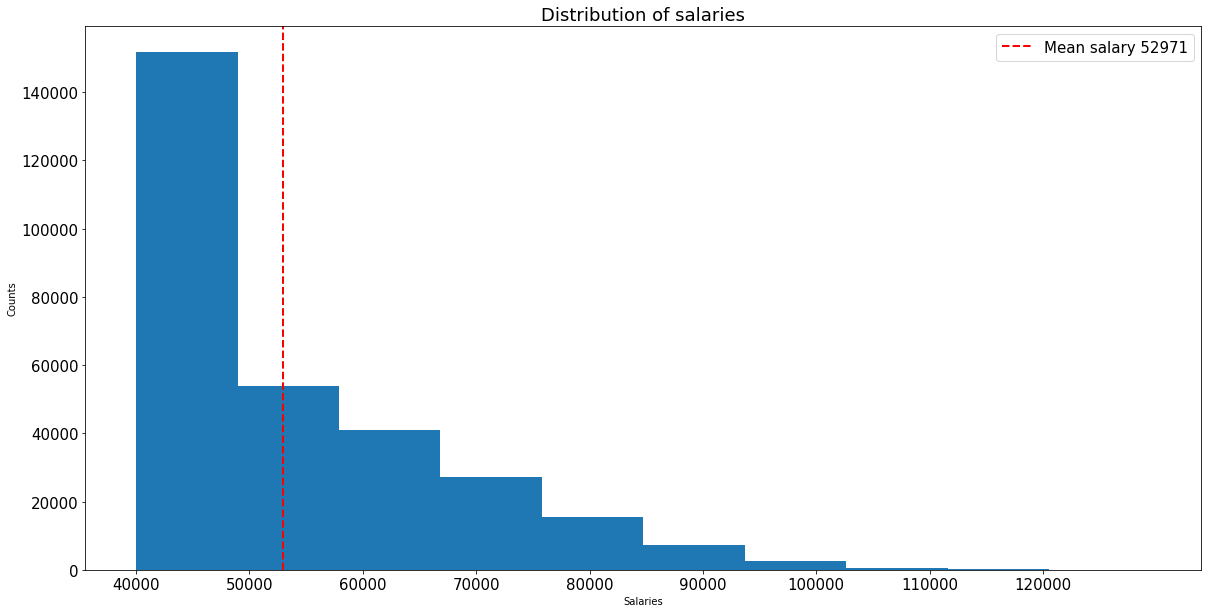

Sample does not look Gaussian/normal (reject NULL hypothesis p-value = 0.021951773058690505


In [10]:
# Display the distribution of the salaries
# source - UCF Bootcamp stats training :)
# and to help me understand the result of normaltest
# https://datascienceplus.com/normality-tests-in-python/
# draw an average line in histogram
#https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

#adjust the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#set tick font size and plot font size
plt.tick_params(labelsize=15)
plt.rcParams.update({'font.size': 15})

#histogram, labels and mean line
plt.hist(salaries_df['salary'])
plt.title("Distribution of salaries")
plt.xlabel('Salaries')
plt.ylabel('Counts')
plt.axvline(salaries_df['salary'].mean(), color='r', linestyle='dashed', linewidth=2,label='Mean salary '+str(round(salaries_df['salary'].mean())))
plt.legend()

x_axis = np.arange(min_salary,max_salary,10000)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# save then show
plt.savefig("./Images/distribution_salaryp.png")
plt.show()

# normality test
# provide the p-value
stat, p = sts.normaltest(salaries_df['salary'].sample(50))

# interpret
alpha = 0.05
if p > alpha:
    print(f'Sample looks Gaussian/normal (fail to reject NULL hypothesis p-value = {p}')
else:
    print(f'Sample does not look Gaussian/normal (reject NULL hypothesis p-value = {p}')

In [11]:
# query db to get the average salaries by title
avg_title_salaries_df = (pd.read_sql_query(
                        '''select t.title,round(avg(s.salary)) average_title_salary
                        from salaries s
                        join titles t on
                        t.emp_no = s.emp_no
                        group by t.title;
                        ''', cnx)
                        )

In [12]:
# examine the saverafe salaries vy title
avg_title_salaries_df.head(7)

,title,average_title_salary
0,Assistant Engineer,48493.0
1,Engineer,48540.0
2,Manager,51531.0
3,Senior Engineer,48507.0
4,Senior Staff,58503.0
5,Staff,58465.0
6,Technique Leader,48581.0


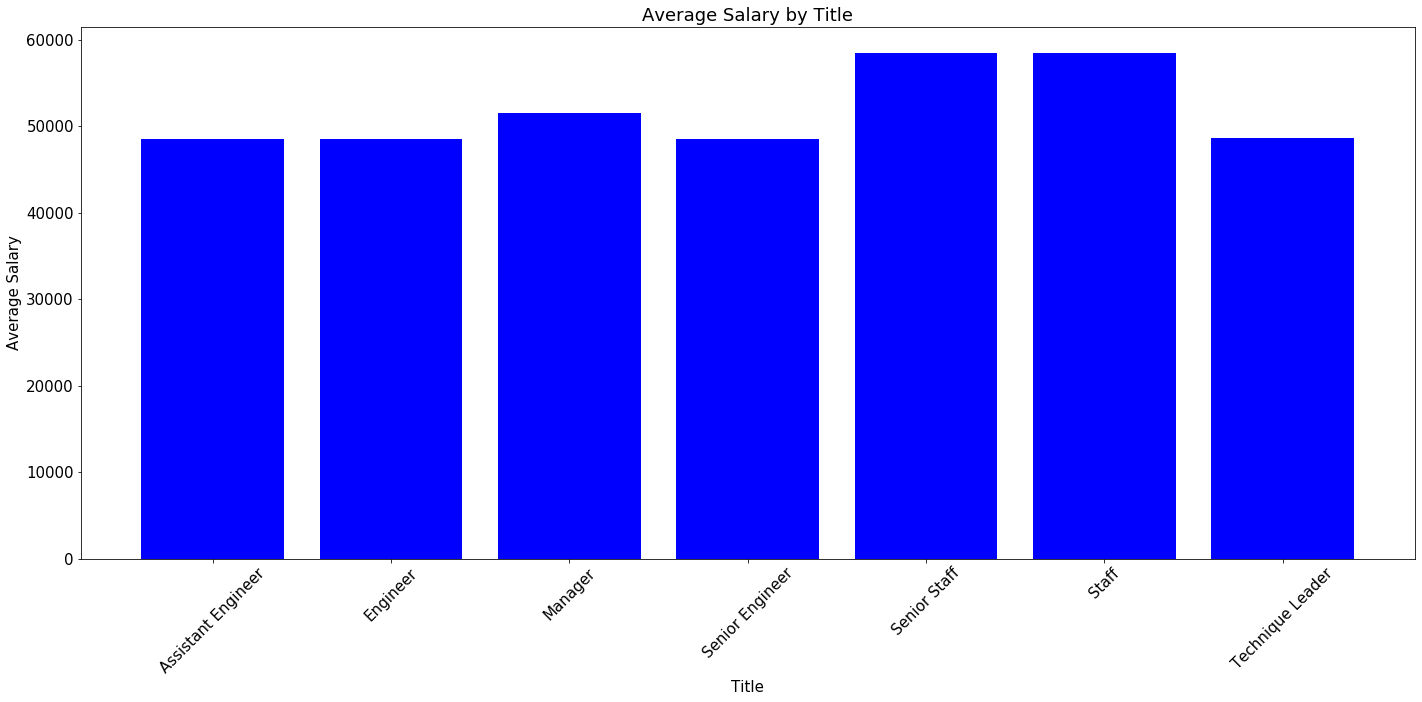

In [13]:
# create a bar chart of average salaries by title
#Source reference on fig size
# https://stackabuse.com/python-data-visualization-with-matplotlib/
titles = avg_title_salaries_df['title']
x_axis = np.arange(len(titles))
y_axis = avg_title_salaries_df['average_title_salary']

#set tick font size and plot font size
plt.tick_params(labelsize=15)
plt.rcParams.update({'font.size': 15})

#set figue size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

# Labels and titles
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, titles,rotation=45)

#save our chart
plt.tight_layout()
plt.savefig("./Images/bar_average_salary_by_title.png")

## Epilogue

This data is very skewed. Far too many employees have a salary of 40k .

Evidence in hand, you march into your boss's office and present the visualization. 
With a sly grin, your boss thanks you for your work. On your way out of the office, 
you hear the words, "Search your ID number." 
You look down at your badge to see that your employee ID number is 499942.

HAHAHAHA - My name is April Foolsday!!!!!!